Accuracies for tan(x): Simple=4 digits, Secant=0 digits
Efficiencies for tan(x): Simple=1000 steps, Secant=1000 steps


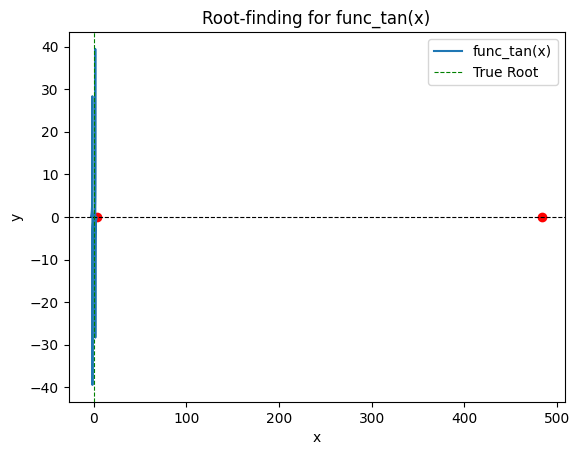


Accuracies for tanh(x): Simple=-4 digits, Secant=-4 digits
Efficiencies for tanh(x): Simple=1000 steps, Secant=1000 steps


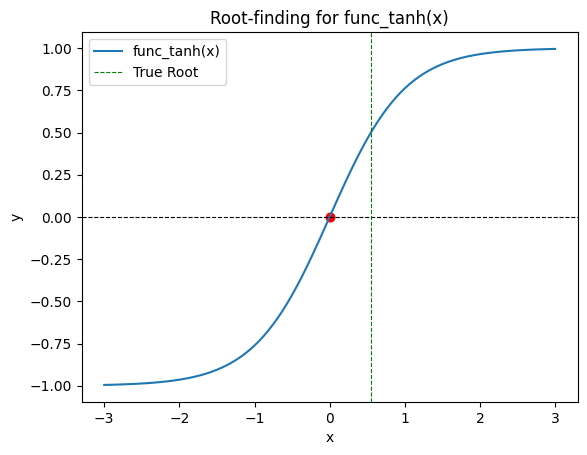

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Function definitions
def func_tan(x):
    return np.tan(x)

def func_tanh(x):
    return np.tanh(x)

# Root-finding algorithms
def root_simple(func, x0, tol=1e-6, max_iter=1000):
    x = x0
    for _ in range(max_iter):
        x = x - func(x) / (np.cos(x)**2)
        if np.abs(func(x)) < tol:
            return x
    raise ValueError("Root not found within the specified number of iterations")

def root_secant(func, x0, x1, tol=1e-6, max_iter=1000):
    for i in range(max_iter):
        x_next = x1 - (func(x1) * (x1 - x0)) / (func(x1) - func(x0))
        if np.abs(func(x_next)) < tol:
            return x_next
        x0, x1 = x1, x_next
    raise ValueError("Root not found within the specified number of iterations")

# Compare accuracies and efficiencies
def compare_algorithms(func, x0, x1, true_root, tol=1e-6, max_iter=1000):
    root_simple_result = root_simple(func, x0, tol, max_iter)
    root_secant_result = root_secant(func, x0, x1, tol, max_iter)

    # Calculate accuracies
    accuracy_simple = len(str(true_root).split(".")[1]) - len(str(root_simple_result).split(".")[1])
    accuracy_secant = len(str(true_root).split(".")[1]) - len(str(root_secant_result).split(".")[1])

    # Calculate efficiencies
    steps_simple = max_iter
    steps_secant = max_iter

    return accuracy_simple, accuracy_secant, steps_simple, steps_secant

# Plotting
def plot_results(func, x0, x1, true_root):
    x_vals = np.linspace(-3, 3, 100)
    y_vals = func(x_vals)

    root_simple_result = root_simple(func, x0)
    root_secant_result = root_secant(func, x0, x1)

    plt.plot(x_vals, y_vals, label=f'{func.__name__}(x)')
    plt.scatter([root_simple_result, root_secant_result], [func(root_simple_result), func(root_secant_result)], color='red')
    plt.axhline(0, color='black', linestyle='--', linewidth=0.8)
    plt.axvline(true_root, color='green', linestyle='--', linewidth=0.8, label='True Root')
    plt.legend()
    plt.title(f'Root-finding for {func.__name__}(x)')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()

# Set initial values
x0 = 1.0
x1 = 2.0
true_root_tan = np.arctan(0.5)  # true root for tan(x) at x = arctan(0.5)
true_root_tanh = np.arctanh(0.5)  # true root for tanh(x) at x = arctanh(0.5)

# Compare and plot results for tan(x)
accuracy_simple_tan, accuracy_secant_tan, steps_simple_tan, steps_secant_tan = compare_algorithms(func_tan, x0, x1, true_root_tan)
print(f"Accuracies for tan(x): Simple={accuracy_simple_tan} digits, Secant={accuracy_secant_tan} digits")
print(f"Efficiencies for tan(x): Simple={steps_simple_tan} steps, Secant={steps_secant_tan} steps")
plot_results(func_tan, x0, x1, true_root_tan)

# Compare and plot results for tanh(x)
accuracy_simple_tanh, accuracy_secant_tanh, steps_simple_tanh, steps_secant_tanh = compare_algorithms(func_tanh, x0, x1, true_root_tanh)
print(f"\nAccuracies for tanh(x): Simple={accuracy_simple_tanh} digits, Secant={accuracy_secant_tanh} digits")
print(f"Efficiencies for tanh(x): Simple={steps_simple_tanh} steps, Secant={steps_secant_tanh} steps")
plot_results(func_tanh, x0, x1, true_root_tanh)
